# Enernoc 100 Building

In [1]:
#Importing required libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas as pd

import json

import os

from matplotlib.pyplot import *

import ipyleaflet as ipyl
import ipywidgets as ipyw
import json
import glob

from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)


### Importing Meta data file, which contains: INDUSTRY, SUB INDUSTRY, SQ FOOT etc. 

In [237]:

meta_df =  pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/meta/all_sites.csv")



### Importing Sampple data file from csv 10, which contains: VALUE, date and time, estimated etc.

In [271]:
sample_df = pd.read_csv("C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/10.csv", infer_datetime_format=True)

In [3]:
rawfilepath = "C:/Users/arjun/Documents/Enernoc_Project_Aj/Data_csv/csv/"

In [5]:
filelist = os.listdir(rawfilepath)

In [278]:
sample_df['dttm_utc'] = pd.to_datetime(sample_df['dttm_utc'], infer_datetime_format=True)


In [262]:
sample_df['new_time'] = pd.to_datetime(sample_df['new_time'])

KeyError: 'new_time'

In [272]:
sample_df.head(15)

,timestamp,dttm_utc,value,estimated,anomaly
0,1325376600,2012-01-01 00:10:00,105.7895,0,NaN
1,1325376900,2012-01-01 00:15:00,104.7318,0,NaN
2,1325377200,2012-01-01 00:20:00,102.2920,0,NaN
3,1325377500,2012-01-01 00:25:00,102.7851,0,NaN
4,1325377800,2012-01-01 00:30:00,101.6106,0,NaN
5,1325378100,2012-01-01 00:35:00,100.6438,0,NaN
6,1325378400,2012-01-01 00:40:00,101.1305,0,NaN
7,1325378700,2012-01-01 00:45:00,101.9675,0,NaN
8,1325379000,2012-01-01 00:50:00,101.4549,0,NaN
9,1325379300,2012-01-01 00:55:00,99.7548,0,NaN


In [295]:
sample_df['date'] = sample_df['dttm_utc'].dt.date
sample_df['time'] = sample_df['dttm_utc'].dt.time

In [299]:
sample_df['date'] = pd.to_datetime(sample_df['date'], infer_datetime_format=True)
sample_df['time'] = pd.to_datetime(sample_df['time'], infer_datetime_format=True)

TypeError: <class 'datetime.time'> is not convertible to datetime

In [298]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105407 entries, 0 to 105406
Data columns (total 7 columns):
timestamp    105407 non-null int64
dttm_utc     105407 non-null datetime64[ns]
value        105407 non-null float64
estimated    105407 non-null int64
anomaly      0 non-null float64
date         105407 non-null datetime64[ns]
time         105407 non-null object
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 5.6+ MB


In [287]:
set1 = sample_df[(sample_df['dttm_utc'] > '2012-01-01 16:25:00') & (sample_df['dttm_utc'] < '2012-01-01 21:20:00')]

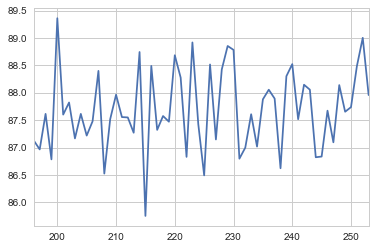

In [291]:
set1['value'].plot()

In [344]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105407 entries, 0 to 105406
Data columns (total 8 columns):
timestamp    105407 non-null int64
dttm_utc     105407 non-null datetime64[ns]
value        105407 non-null float64
estimated    105407 non-null int64
anomaly      0 non-null float64
date         105407 non-null datetime64[ns]
time         105407 non-null object
hour         105407 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 6.4+ MB


In [235]:
set2['hour'].unique()

array([5, 6, 7, 8], dtype=int64)

In [338]:
set3 = sample_df[(sample_df['dttm_utc'] >= '2012-01-01 16:10:00') & (sample_df['dttm_utc'] <= '2012-01-01 22:10:00')]

In [341]:
set3.head(2)

,timestamp,dttm_utc,value,estimated,anomaly,date,time,hour
192,1325434200,2012-01-01 16:10:00,87.2571,0,NaN,2012-01-01,16:10:00,16
193,1325434500,2012-01-01 16:15:00,87.8151,0,NaN,2012-01-01,16:15:00,16


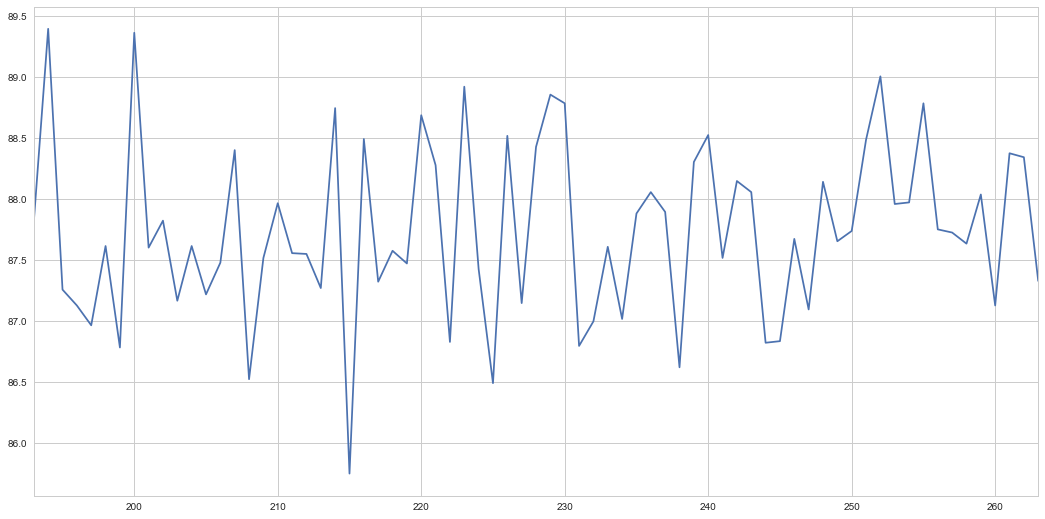

In [335]:
set3['value'].plot(kind='line',figsize=(18,9))

In [189]:
sample_df['new_date'] = [d.date() for d in sample_df['dttm_utc']]
sample_df['new_time'] = [d.time() for d in sample_df['dttm_utc']]

In [266]:
sample_df(['new_time'], dtype='datetime64[ns]', freq=None)

TypeError: 'DataFrame' object is not callable

In [204]:
sample_df['new_time1'] = sample_df['dttm_utc'].dt.time

In [ ]:
sample_df['new_time1'] = pd.to_datetime(sample_df['new_time1'])

In [300]:
sample_df['hour'] = pd.to_datetime(sample_df['dttm_utc'], format='%H:%M').dt.hour

In [301]:
sample_df.head()

,timestamp,dttm_utc,value,estimated,anomaly,date,time,hour
0,1325376600,2012-01-01 00:10:00,105.7895,0,NaN,2012-01-01,00:10:00,0
1,1325376900,2012-01-01 00:15:00,104.7318,0,NaN,2012-01-01,00:15:00,0
2,1325377200,2012-01-01 00:20:00,102.2920,0,NaN,2012-01-01,00:20:00,0
3,1325377500,2012-01-01 00:25:00,102.7851,0,NaN,2012-01-01,00:25:00,0
4,1325377800,2012-01-01 00:30:00,101.6106,0,NaN,2012-01-01,00:30:00,0


In [308]:
sample_df[['date','hour']]

,date,hour
0,2012-01-01,0
1,2012-01-01,0
2,2012-01-01,0
3,2012-01-01,0
4,2012-01-01,0
5,2012-01-01,0
6,2012-01-01,0
7,2012-01-01,0
8,2012-01-01,0
9,2012-01-01,0


In [319]:
for sample_df(sample_df['date']) > '2012-01-01':
#     for sample_df['hour']== 6:
        print(sample_df['value'])
        
        
#         sample_df[(sample_df['dttm_utc'] > '2012-01-01')

SyntaxError: invalid syntax (<ipython-input-319-3ec43d6e41b4>, line 1)

In [302]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105407 entries, 0 to 105406
Data columns (total 8 columns):
timestamp    105407 non-null int64
dttm_utc     105407 non-null datetime64[ns]
value        105407 non-null float64
estimated    105407 non-null int64
anomaly      0 non-null float64
date         105407 non-null datetime64[ns]
time         105407 non-null object
hour         105407 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 6.4+ MB


In [304]:
set3.tail()

,timestamp,dttm_utc,value,estimated,anomaly
857,1325633700,2012-01-03 23:35:00,289.5439,0,NaN
858,1325634000,2012-01-03 23:40:00,309.3937,0,NaN
859,1325634300,2012-01-03 23:45:00,317.2518,0,NaN
860,1325634600,2012-01-03 23:50:00,308.1802,0,NaN
861,1325634900,2012-01-03 23:55:00,298.1094,0,NaN


In [305]:
# sample_df[sample_df.dt.strftime('%H:%M:%S').between('00:00:00','12:00:00')]

sample_df[sample_df.dt.strftime('%H:%M:%S').between('00:00:00','12:00:00')]

AttributeError: 'DataFrame' object has no attribute 'dt'

### # Sample df ends!

### # Creating a class Energy_analysis 

In [336]:

class Energy_analysis(object):
#''' it contains methods for analysis for movie dataset :  
# ''' it contains plotting null values, finding top rated by column names, plotting bar and scatter plots, mean and sum groupby ''
    
    def __init__(self, df):
        self.df = df
        
    def null_plot(self):
#plots bar graph for all the null values in a dataframe
        null = self.df.isnull().sum().plot(kind = 'bar',figsize = (10,5))
        return null
    
######################---Top---###################################
        
    def top_rated(self, col1, col2,clo3, col4):
 # function that takes 4 column names, groups by maximum of col1 w.r.t(displays) col2,3,4 and sorts by col2       
        mr = self.df.groupby(col1)[col2, clo3,col4].max().sort_values(by = col2, ascending = False)
        return mr
    
#     def top_n(self, col1, col2,col3,col4, n):
# # Top n (n = natural number) for any two columns within any df along with dataframe df.
#     #Finds top n of two columns!
# #where col1 = displayed w.r.t col2's nlargest values
#         topn = self.df.nlargest(n, col2)[[col1,col2,col3,col4]].reset_index()
#         return topn 
    
    def top_n(self, col1, col2,col3,col4, n):
    #to find Top n of any two columns(col1, col2), in a Dataframe(df).
        tn = self.df.nlargest(n, col2)[[col1,col2,col3,col4]].reset_index(drop=True)
        return tn
    
    def top_10(self, col1, col2):
    #to find Top 10 of any two columns(col1, col2), in a Dataframe(df).
        t10 = self.df.nlargest(10, col2)[[col1,col2]].reset_index(drop=True)
        return t10
    
    
    def top_rated_year(self,col1,col2,col3,year):
        myr = self.df.groupby(col1).max().loc[year][[col2,col3]]
        return myr
    
    
    def top_25(self, col1,col2):
    ## Need to be improved
    #group by col1 with summation of col2 and naming the col2 with col2name
        smm = self.df[col2].groupby(self.df[col1]).sum().head(25)
        smm = smm.to_frame(name= col2)
        sn = smm.sort_values(col2, ascending = False)
        return smm,sn
    
########################--Least--###############################################
  
    def least_n(self, col1, col2,col3,col4, n):
    #to find Least n of any two columns(col1, col2), in a Dataframe(df)  but view by 4 columns.
        ln = self.df.nsmallest(n, col2)[[col1,col2,col3,col4]].reset_index(drop=True)
        return ln
    
    
    def least_rated_year(self,col1,col2,col3,year):
        lyr = self.df.groupby(col1).min().loc[year][[col2,col3]]
        return lyr

    
    def last_n(self, col1,col2,col3,n):
        ln = self.df.groupby(col1)[col2,col3].max().tail(n)
        return ln

    
    
##############---Sum & Mean Groupby---##########################################   
    def mean_groupby(self, col1, col2, col3):
    #gropping colomns with mean aggregation. 
        agrp = df.groupby(col1)[col2,col3 ].agg('mean')
        return agrp 
    
    
    def sum_groupby(self, col1, col2, col3):
#gropping colomns with sum aggregation. 
# Function to Groupby by one colomn w.r.t two other colomns. 
        grp = self.df.groupby(col1)[col2,col3 ].agg('sum')
        return grp
    
    
################################Return on Investment #############################
    




#####################---Graphs----##################### 
    def barplot_col(self, col1, col2,labelx,labely):
 # Function to plot a Red Bar plot with two colomns in a given Dataframe(df).
    #to plot a dataframes' Bar graph, colums and their labels 
        bplot = self.df.plot(kind='bar',x=col1 ,y=col2, figsize=(18,9), color='darkblue')
        xl =plt.xlabel(labelx)
        yl = plt.ylabel(labely)
        return bplot, xl,yl

In [26]:
# Functions 

def sum_value_hr(df,col1,col2,n):
    v = df[df[col1]== n]
    k = v.groupby(col1)[col2].agg('sum')
    k = k/12
    k = k.apply(int)
    return k


def sum_id(df,n):
# to find the total energy in a given site_ID
    v = df[df['SITE_ID']== n]
    k = v.groupby('SITE_ID')['value'].agg('sum')
    return k
# sum_id(meta_annualdata,"site_id","value",832)


###############---Time series---######################

def conv_datetime(df,col,):
# converting datatime to datetime format for analysis    
    dt = df[col] = pd.to_datetime(df[col])
    return dt

def time_c(df,date1,date2):
    tc = df[(df['dttm_utc'] > date1) & (df['dttm_utc'] < date2)]
    r = tc.resample('1H', on='dttm_utc').mean()
    r = r['value'].plot()
    return r




In [ ]:
path =r"C:\\Users\\arjun\\Documents\\Enernoc_Project_Aj\\Test" # use your path

allFiles = glob.glob(path + "/*.csv")
# frame = pd.DataFrame()
dflist = []
for f in allFiles:
   file_name = f[54:-4]
   df = pd.read_csv(f)
   df.insert(1, 'site_id', file_name)
   dflist.append(df)
    
site_df = pd.concat(dflist)



def glob_files(df,path,)

In [14]:
meta_df.describe()

,SITE_ID,SQ_FT,LAT,LNG
count,100.000000,1.000000e+02,100.000000,100.000000
mean,338.880000,2.252528e+05,38.345746,-90.367199
std,276.371119,3.448437e+05,3.535717,18.734536
min,6.000000,1.821000e+03,27.848625,-122.701918
25%,85.500000,4.266150e+04,35.348406,-113.043608
50%,278.000000,9.210550e+04,38.729362,-80.486509
75%,546.000000,2.022598e+05,40.758628,-75.206820
max,887.000000,1.807149e+06,47.820017,-71.060518


### # Importing 3(sites)/100 datasets. to work.  

### Merging data sets in csv.

In [27]:
path =r"C:\\Users\\arjun\\Documents\\Enernoc_Project_Aj\\Test" # use your path

allFiles = glob.glob(path + "/*.csv")
# frame = pd.DataFrame()
dflist = []
for f in allFiles:
   file_name = f[54:-4]
   df = pd.read_csv(f)
   df.insert(1, 'site_id', file_name)
   dflist.append(df)
    
site_df = pd.concat(dflist)

In [28]:
site_df['site_id'].unique()

array(['275', '832', '9'], dtype=object)

In [29]:
site_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316224 entries, 0 to 105407
Data columns (total 6 columns):
timestamp    316224 non-null int64
site_id      316224 non-null object
dttm_utc     316224 non-null object
value        316224 non-null float64
estimated    316224 non-null int64
anomaly      0 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 16.9+ MB


In [33]:
#Converting dttm to datetime series

g = conv_datetime(site_df,"dttm_utc")

In [34]:
site_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316224 entries, 0 to 105407
Data columns (total 6 columns):
timestamp    316224 non-null int64
site_id      316224 non-null object
dttm_utc     316224 non-null datetime64[ns]
value        316224 non-null float64
estimated    316224 non-null int64
anomaly      0 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 16.9+ MB


#### # dropping timestamp column

In [82]:
site_df.drop('timestamp', axis=1, inplace=True)

In [83]:
site_df.head(5)

,site_id,dttm_utc,value,estimated,anomaly
0,275,2012-01-01 00:05:00,5.2848,0,NaN
1,275,2012-01-01 00:10:00,5.2848,0,NaN
2,275,2012-01-01 00:15:00,5.2848,0,NaN
3,275,2012-01-01 00:20:00,5.2848,0,NaN
4,275,2012-01-01 00:25:00,5.1493,0,NaN


In [91]:
sites = Energy_analysis (site_df)

In [96]:
meta = Energy_analysis(meta_df)

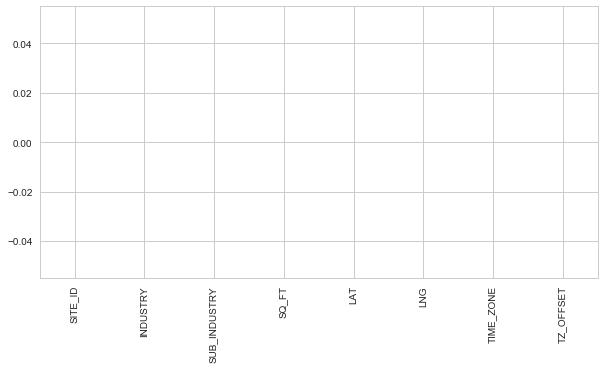

In [97]:
meta.null_plot()

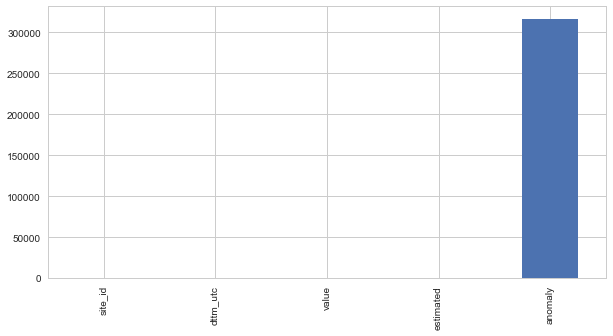

In [92]:
sites.null_plot()

In [100]:
meta_df.head(2)

,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,-06:00
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,-04:00


In [103]:
meta.sum_groupby("INDUSTRY","SUB_INDUSTRY","SQ_FT")
   

,SQ_FT
INDUSTRY,
Commercial Property,15262902
Education,3490943
Food Sales & Storage,1045712
Light Industrial,2725726


In [105]:
 k =sites.sum_groupby("site_id","dttm_utc","value")

In [107]:
k_df =pd.DataFrame(k)  

k_df

,value
site_id,
9,2.947185e+06
275,7.248929e+05
832,8.191383e+06


In [109]:
k_df['site_id'] = k_df.index

In [114]:
k_df.head()

,value,site_id
site_id,,
9,2.947185e+06,9
275,7.248929e+05,275
832,8.191383e+06,832


In [113]:
meta_total = pd.merge(meta_df, k_df, left_on="SITE_ID", right_on="site_id")

In [111]:
meta_total

,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET,value,site_id
0,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,2.947185e+06,9
1,275,Education,Primary/Secondary School,108405,40.269343,-74.745143,America/New_York,-04:00,7.248929e+05,275
2,832,Light Industrial,Manufacturing,186614,35.811100,-89.969061,America/Chicago,-05:00,8.191383e+06,832


In [159]:
meta_total_all =pd.merge(meta_df, k_df,how='outer', left_on="site_id", right_on="site_id")

In [160]:
meta_total_all

,site_id,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET,value
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,-06:00,NaN
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,-04:00,NaN
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,2.947185e+06
3,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00,NaN
4,12,Commercial Property,Business Services,179665,39.694541,-74.899166,America/New_York,-04:00,NaN
5,13,Commercial Property,Commercial Real Estate,185847,38.784651,-77.478337,America/New_York,-04:00,NaN
6,14,Commercial Property,Business Services,1675720,47.820017,-122.101407,America/Los_Angeles,-07:00,NaN
7,21,Commercial Property,Shopping Center/Shopping Mall,783982,36.806651,-76.828771,America/New_York,-04:00,NaN
8,22,Commercial Property,Bank/Financial Services,318130,38.167806,-122.701918,America/Los_Angeles,-07:00,NaN
9,25,Commercial Property,Shopping Center/Shopping Mall,1807149,41.981517,-71.621050,America/New_York,-04:00,NaN


In [161]:
 meta_total_all.rename(columns={'site_id': 'SITE_ID'},inplace = True)

In [164]:
meta_total_all

,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET,value
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,-06:00,NaN
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,-04:00,NaN
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,2.947185e+06
3,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00,NaN
4,12,Commercial Property,Business Services,179665,39.694541,-74.899166,America/New_York,-04:00,NaN
5,13,Commercial Property,Commercial Real Estate,185847,38.784651,-77.478337,America/New_York,-04:00,NaN
6,14,Commercial Property,Business Services,1675720,47.820017,-122.101407,America/Los_Angeles,-07:00,NaN
7,21,Commercial Property,Shopping Center/Shopping Mall,783982,36.806651,-76.828771,America/New_York,-04:00,NaN
8,22,Commercial Property,Bank/Financial Services,318130,38.167806,-122.701918,America/Los_Angeles,-07:00,NaN
9,25,Commercial Property,Shopping Center/Shopping Mall,1807149,41.981517,-71.621050,America/New_York,-04:00,NaN


In [29]:
sum_groupby(meta_annualdata,"value","INDUSTRY","SUB_INDUSTRY","SQ_FT")

INDUSTRY             SUB_INDUSTRY              SQ_FT 
Commercial Property  Corporate Office          169420    2.947185e+06
Education            Primary/Secondary School  108405    7.248929e+05
Light Industrial     Manufacturing             186614    8.191383e+06
Name: value, dtype: float64

In [28]:
def barplot_col(df, col1, col2,labelx,labely):
 # Function to plot a Red Bar plot with two colomns in a given Dataframe(df).
    #to plot a dataframes' Bar graph, colums and their labels 
        bplot = df.plot(kind='bar',x=col1 ,y=col2, figsize=(18,9), color='darkblue')
        xl =plt.xlabel(labelx)
        yl = plt.ylabel(labely)
        return bplot, xl,yl

In [54]:
meta_annualdata['value']=meta_annualdata['value'].apply(int)

In [55]:
meta_annualdata['value'].dtypes

dtype('int64')

In [ ]:
site_df['site_id'] = site_df['site_id'].apply(int)

In [ ]:
# barplot_col(meta_annualdata, "INDUSTRY", "value", "ind","kw")

KeyboardInterrupt: 

In [66]:
def sum_value_hr(df,col1,col2,n):
    v = df[df[col1]== n]
    k = v.groupby(col1)[col2].agg('sum')
    k = k/12
    k = k.apply(int)
    return k

In [67]:
def sum_id(df,col1,col2,n):
    v = df[df[col1]== n]
    k = v.groupby(col1)[col2].agg('sum')
    return k
           
           

In [70]:
meta_annualdata['site_id'].unique()

array([  9, 275, 832], dtype=int64)

In [ ]:
meta

In [75]:
meta_df.tail()

,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET
95,786,Light Industrial,Food Processing,31727,42.949256,-112.184007,America/Denver,-06:00
96,805,Light Industrial,Food Processing,58421,42.244998,-71.060518,America/New_York,-04:00
97,808,Light Industrial,Food Processing,76915,40.406980,-75.070184,America/New_York,-04:00
98,832,Light Industrial,Manufacturing,186614,35.811100,-89.969061,America/Chicago,-05:00
99,887,Light Industrial,Food Processing,381939,38.831950,-75.825022,America/New_York,-04:00


In [72]:
sum_id(meta_annualdata,"site_id","value",832)

site_id
832    8158832
Name: value, dtype: int64

In [68]:
sum_id(meta_annualdata,"SITE_ID","value",9)

SITE_ID
9    2895005
Name: value, dtype: int64

In [69]:
sum_value_hr(meta_annualdata,"SITE_ID","value",9)

SITE_ID
9    241250
Name: value, dtype: int64

In [26]:
meta_annualdata = pd.merge(meta_df, site_df, left_on="SITE_ID", right_on="site_id")

In [27]:
meta_annualdata.head(5)

,SITE_ID,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET,timestamp,site_id,dttm_utc,value,estimated,anomaly
0,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,1325376300,9,2012-01-01 00:05:00,17.9272,0,NaN
1,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,1325376600,9,2012-01-01 00:10:00,19.4861,0,NaN
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,1325376900,9,2012-01-01 00:15:00,17.9272,0,NaN
3,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,1325377200,9,2012-01-01 00:20:00,18.7066,0,NaN
4,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,1325377500,9,2012-01-01 00:25:00,18.7066,0,NaN


In [24]:
site_df['site_id'] = site_df['site_id'].apply(int)

### ##### Experiment #######

In [ ]:
test-meta_df = pd.merge(meta_df, site_df, left_on="SITE_ID", right_on="site_id")


In [128]:
k_df.head()

,value,site_id
site_id,,
9,2.947185e+06,9
275,7.248929e+05,275
832,8.191383e+06,832


In [ ]:
k_df, meta_df

In [120]:
mdf = meta_df.rename(columns={'SITE_ID': 'site_id'},inplace = True)

In [129]:
mdf = meta_df
mdf

,site_id,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,-06:00
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,-04:00
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00
3,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00
4,12,Commercial Property,Business Services,179665,39.694541,-74.899166,America/New_York,-04:00
5,13,Commercial Property,Commercial Real Estate,185847,38.784651,-77.478337,America/New_York,-04:00
6,14,Commercial Property,Business Services,1675720,47.820017,-122.101407,America/Los_Angeles,-07:00
7,21,Commercial Property,Shopping Center/Shopping Mall,783982,36.806651,-76.828771,America/New_York,-04:00
8,22,Commercial Property,Bank/Financial Services,318130,38.167806,-122.701918,America/Los_Angeles,-07:00
9,25,Commercial Property,Shopping Center/Shopping Mall,1807149,41.981517,-71.621050,America/New_York,-04:00


In [139]:
test_meta= pd.merge(meta_df, k_df,how='outer', left_on="site_id", right_on="site_id")

In [140]:
test_meta.drop('TZ_OFFSET',axis = 1)

,site_id,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,value
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,NaN
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,NaN
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,2.947185e+06
3,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,NaN
4,12,Commercial Property,Business Services,179665,39.694541,-74.899166,America/New_York,NaN
5,13,Commercial Property,Commercial Real Estate,185847,38.784651,-77.478337,America/New_York,NaN
6,14,Commercial Property,Business Services,1675720,47.820017,-122.101407,America/Los_Angeles,NaN
7,21,Commercial Property,Shopping Center/Shopping Mall,783982,36.806651,-76.828771,America/New_York,NaN
8,22,Commercial Property,Bank/Financial Services,318130,38.167806,-122.701918,America/Los_Angeles,NaN
9,25,Commercial Property,Shopping Center/Shopping Mall,1807149,41.981517,-71.621050,America/New_York,NaN


In [141]:
test_meta

,site_id,INDUSTRY,SUB_INDUSTRY,SQ_FT,LAT,LNG,TIME_ZONE,TZ_OFFSET,value
0,6,Commercial Property,Shopping Center/Shopping Mall,161532,34.783001,-106.895250,America/Denver,-06:00,NaN
1,8,Commercial Property,Shopping Center/Shopping Mall,823966,40.320247,-76.404942,America/New_York,-04:00,NaN
2,9,Commercial Property,Corporate Office,169420,40.946751,-74.742087,America/New_York,-04:00,2.947185e+06
3,10,Commercial Property,Shopping Center/Shopping Mall,1029798,39.732504,-75.006861,America/New_York,-04:00,NaN
4,12,Commercial Property,Business Services,179665,39.694541,-74.899166,America/New_York,-04:00,NaN
5,13,Commercial Property,Commercial Real Estate,185847,38.784651,-77.478337,America/New_York,-04:00,NaN
6,14,Commercial Property,Business Services,1675720,47.820017,-122.101407,America/Los_Angeles,-07:00,NaN
7,21,Commercial Property,Shopping Center/Shopping Mall,783982,36.806651,-76.828771,America/New_York,-04:00,NaN
8,22,Commercial Property,Bank/Financial Services,318130,38.167806,-122.701918,America/Los_Angeles,-07:00,NaN
9,25,Commercial Property,Shopping Center/Shopping Mall,1807149,41.981517,-71.621050,America/New_York,-04:00,NaN
